# 🧠 Heart Disease ML Project - Notebook 4: Model Training & Evaluation

This notebook trains multiple machine learning models on selected features from PCA/Feature Selection and evaluates their performance using:

- Accuracy
- Precision
- Recall
- F1 Score
- ROC AUC

It also generates confusion matrices and a performance comparison chart.

---

## 📦 1. Import Required Libraries


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import plotly.express as px
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

## 📥 2. Load Data & Selected Features


In [3]:
X_train = pd.read_csv('/content/heart_disease_train.csv')
X_test = pd.read_csv('/content/heart_disease_test.csv')
y_train = pd.read_csv('/content/heart_disease_train_target.csv')
y_test = pd.read_csv('/content/heart_disease_test_target.csv')

selected_features = joblib.load('/content/selected_features.pkl')
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

## 🗂️ 3. Create Output Folders


In [4]:
os.makedirs("models", exist_ok=True)
os.makedirs("plots", exist_ok=True)

## 🤖 4. Initialize Classifiers


In [5]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

## 🏋️‍♂️ 5. Train and Evaluate Models



🚀 Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



📄 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0      0.931     0.818     0.871        33
           1      0.812     0.929     0.867        28

    accuracy                          0.869        61
   macro avg      0.872     0.873     0.869        61
weighted avg      0.877     0.869     0.869        61



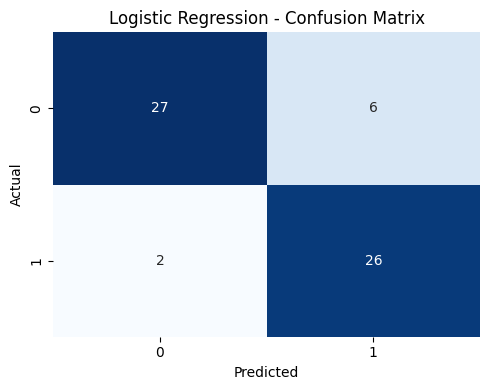


🚀 Training Decision Tree...

📄 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0      0.821     0.697     0.754        33
           1      0.697     0.821     0.754        28

    accuracy                          0.754        61
   macro avg      0.759     0.759     0.754        61
weighted avg      0.764     0.754     0.754        61



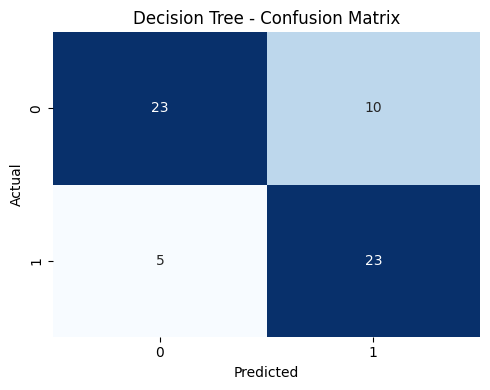


🚀 Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



📄 Random Forest Classification Report:
              precision    recall  f1-score   support

           0      0.903     0.848     0.875        33
           1      0.833     0.893     0.862        28

    accuracy                          0.869        61
   macro avg      0.868     0.871     0.869        61
weighted avg      0.871     0.869     0.869        61



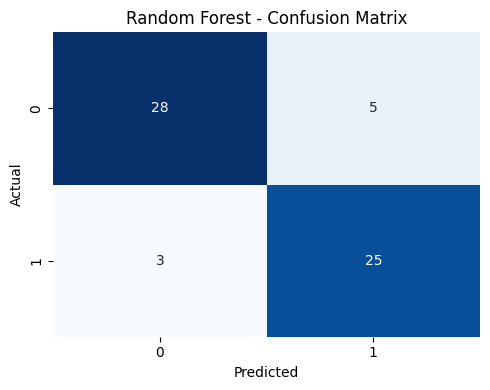


🚀 Training SVM...

📄 SVM Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0      0.967     0.879     0.921        33
           1      0.871     0.964     0.915        28

    accuracy                          0.918        61
   macro avg      0.919     0.922     0.918        61
weighted avg      0.923     0.918     0.918        61



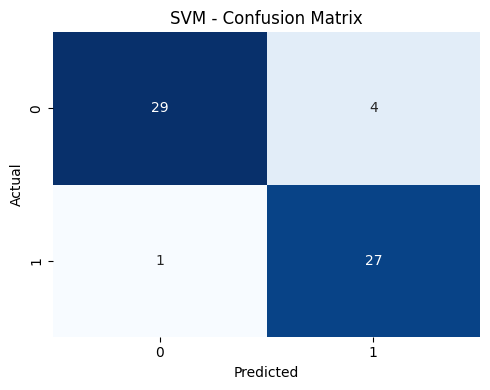

In [6]:
results = []

for name, model in models.items():
    print(f"\n🚀 Training {name}...")

    # Train model
    model.fit(X_train_selected, y_train)

    # Predictions
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1]

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': name,
        'Accuracy': round(accuracy, 3),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3)
    })

    # Save model
    model_filename = f"models/{name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(model, model_filename)

    # Print classification report
    print(f"\n📄 {name} Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig(f'plots/{name.lower().replace(" ", "_")}_cm.png')
    plt.show()

## 📊 6. Compare Model Performance


In [7]:
results_df = pd.DataFrame(results)
print("\n📊 Model Performance Comparison:")
print(results_df)

# Save results
results_df.to_csv("model_performance.csv", index=False)


📊 Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0  Logistic Regression     0.869      0.812   0.929     0.867    0.960
1        Decision Tree     0.754      0.697   0.821     0.754    0.759
2        Random Forest     0.869      0.833   0.893     0.862    0.937
3                  SVM     0.918      0.871   0.964     0.915    0.961


### 📈 Performance Comparison Plot


In [8]:
fig = px.bar(
    results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
    x='Model',
    y='Score',
    color='Metric',
    barmode='group',
    title='Model Performance Metrics',
    template='plotly_white',
    text_auto='.2f'
)
fig.update_layout(width=900, height=500)
fig.write_html("plots/model_comparison.html")
fig.show()


## 🧠 Visualizing Decision Boundaries of Trained Classification Models

In this section, we compare the decision boundaries of different trained classifiers
(Logistic Regression, Decision Tree, Random Forest, and SVM) using features reduced to 2D via PCA.

This helps us understand how each model separates the two classes visually in lower-dimensional space.
The visualization provides an intuitive comparison of classifier behavior.

> ⚠️ Note: The decision boundaries are based on a 2D PCA projection and may not represent performance in full feature space.


In [12]:
def visualize_decision_boundaries(X_train, y_train, output_path="decision_boundaries.png"):
    """
    Trains multiple classifiers and plots decision boundaries after applying PCA.

    Parameters:
    - X_train: pandas DataFrame or numpy array of features
    - y_train: Series or array of labels (binary classification: 0 or 1)
    - output_path: path to save the output image
    """
    # Step 1: Apply PCA to reduce to 2D
    pca_2d = PCA(n_components=2)
    X_train_2d = pca_2d.fit_transform(X_train)

    # Step 2: Create mesh grid for decision surface
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Step 3: Define classifiers
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }

    # Step 4: Plot decision boundaries
    plt.figure(figsize=(18, 12))
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_train_2d, y_train.values.ravel())

        Z = model.predict(grid).reshape(xx.shape)

        plt.subplot(2, 2, i + 1)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
        plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train.values.ravel(), cmap='coolwarm', edgecolors='k')

        plt.title(f"{name} - Decision Boundary")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")

    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()
    print(f"[INFO] Decision boundaries saved to: {output_path}")

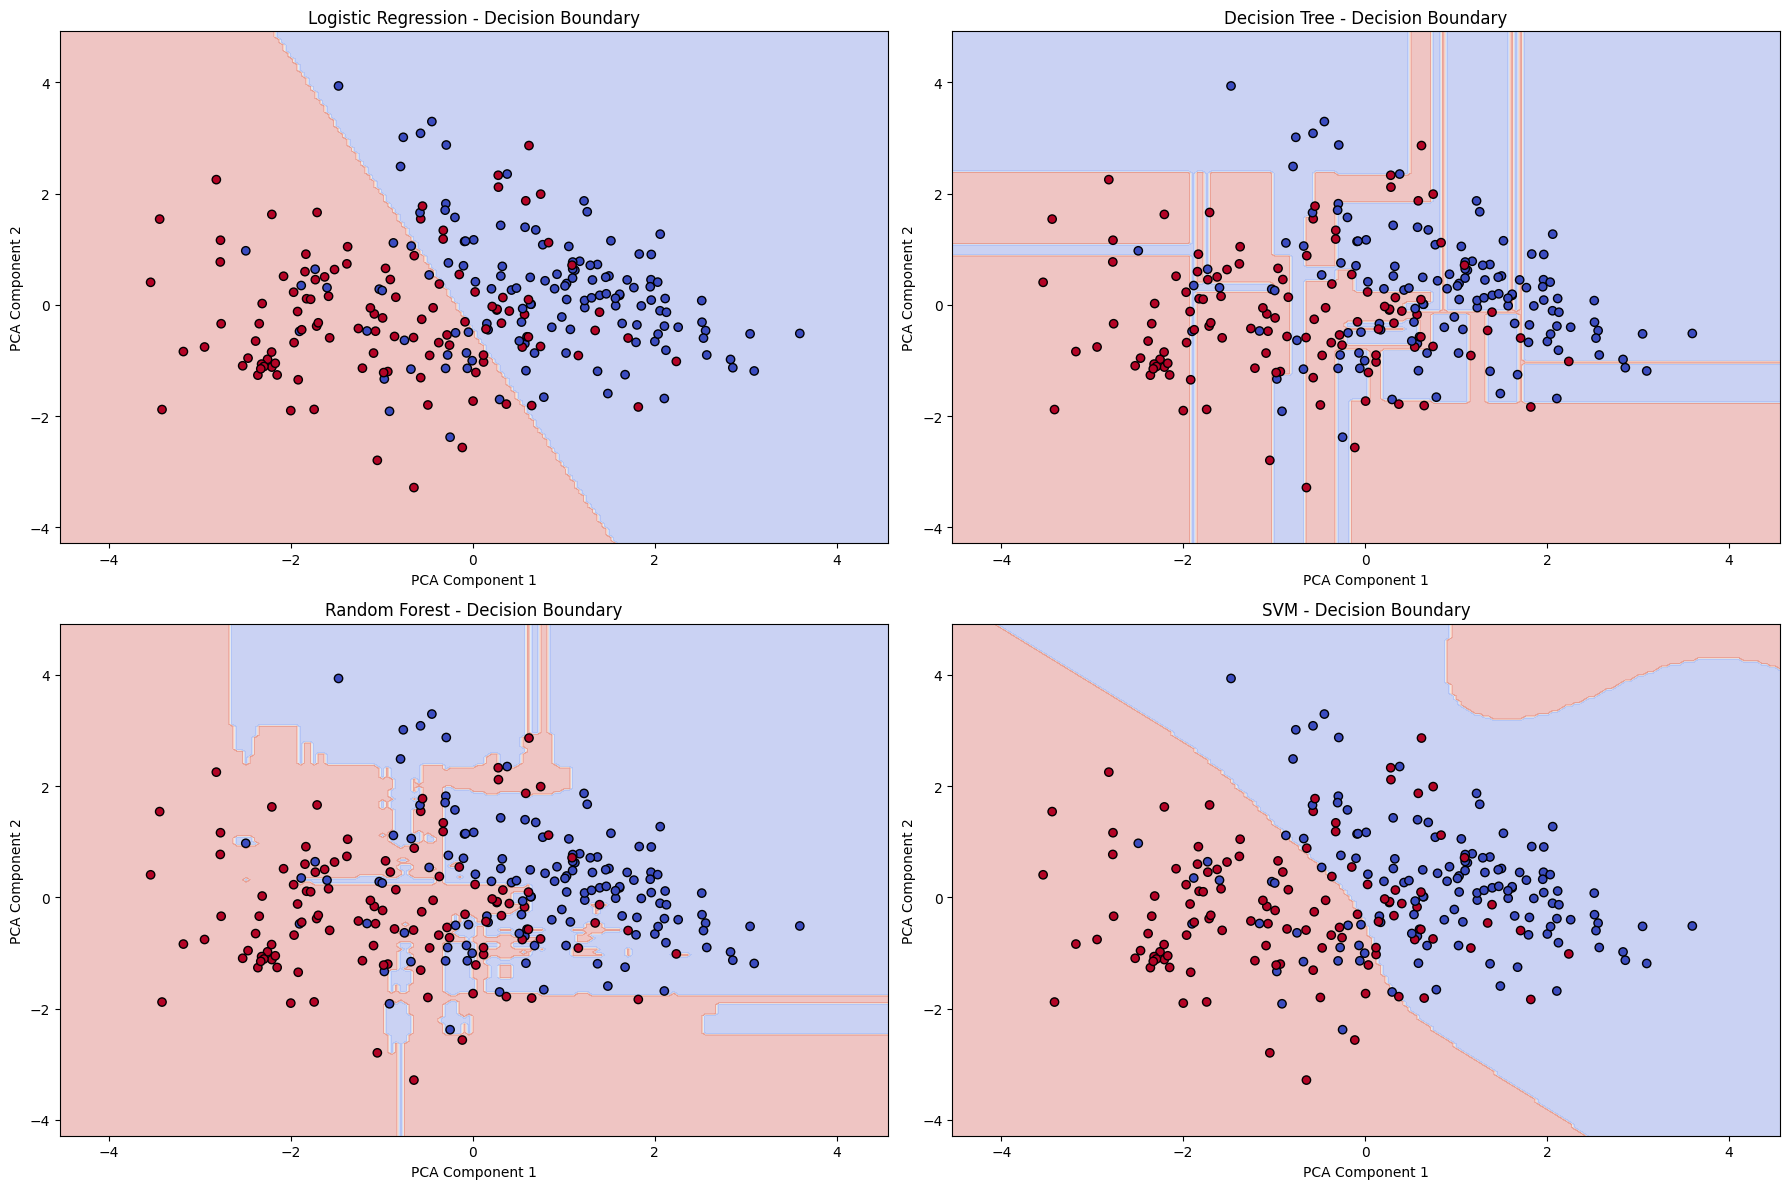

[INFO] Decision boundaries saved to: decision_boundaries.png


In [13]:
# Call the function
visualize_decision_boundaries(X_train_selected, y_train)